In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("nces330_20.csv")

In [3]:
df.head(2)

,Year,State,Type,Length,Expense,Value
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503


In [4]:
df.Year.value_counts()

2013    403
2014    403
2015    403
2016    403
2017    401
2018    398
2019    396
2020    396
2021    345
Name: Year, dtype: int64

In [5]:
df.State.value_counts()

Alabama                 71
Montana                 71
New Hampshire           71
New Jersey              71
New Mexico              71
New York                71
North Carolina          71
North Dakota            71
Ohio                    71
Oklahoma                71
Oregon                  71
Pennsylvania            71
Rhode Island            71
South Carolina          71
South Dakota            71
Tennessee               71
Texas                   71
Utah                    71
Vermont                 71
Virginia                71
Washington              71
West Virginia           71
Wisconsin               71
Nebraska                71
Missouri                71
Illinois                71
California              71
Connecticut             71
Arkansas                71
Arizona                 71
Florida                 71
Georgia                 71
Hawaii                  71
Idaho                   71
Mississippi             71
Indiana                 71
Iowa                    71
K

In [6]:
df.Type.value_counts()

Public Out-of-State    1347
Public In-State        1296
Private                 905
Name: Type, dtype: int64

In [7]:
df.Expense.value_counts()

Fees/Tuition    2198
Room/Board      1350
Name: Expense, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     3548 non-null   int64 
 1   State    3548 non-null   object
 2   Type     3548 non-null   object
 3   Length   3548 non-null   object
 4   Expense  3548 non-null   object
 5   Value    3548 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 166.4+ KB


In [9]:
df.isnull().sum()

Year       0
State      0
Type       0
Length     0
Expense    0
Value      0
dtype: int64

In [10]:
df.dtypes

Year        int64
State      object
Type       object
Length     object
Expense    object
Value       int64
dtype: object

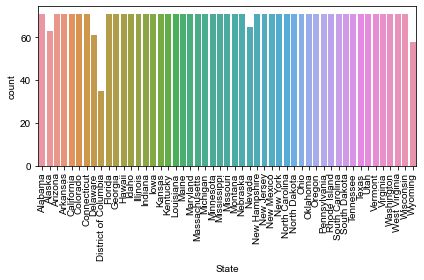

In [11]:
sns.countplot("State",data=df)
sns.set_style("whitegrid")
plt.xticks(rotation=90) # rotate the x-axis labels by 90 degrees
plt.tight_layout() # adjust the plot to fit within the figure area

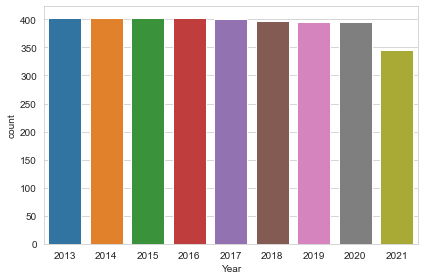

In [12]:
sns.countplot("Year",data=df)
plt.tight_layout()
sns.set_style("whitegrid")

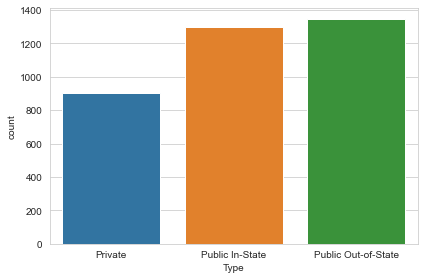

In [13]:
sns.countplot("Type",data=df)
plt.tight_layout()
sns.set_style("whitegrid")

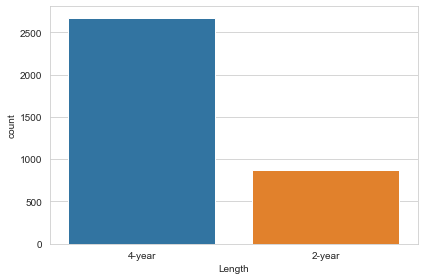

In [14]:
sns.countplot("Length",data=df)
plt.tight_layout()
sns.set_style("whitegrid")

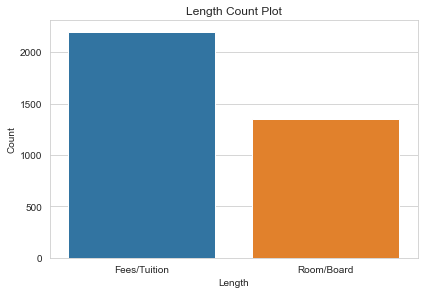

In [15]:
sns.countplot("Expense",data=df)
plt.tight_layout()
sns.set_style("whitegrid")
plt.title("Length Count Plot")
plt.xlabel("Length")
plt.ylabel("Count")
sns.color_palette("husl")
sns.set_style("darkgrid")

In [16]:
df.shape

(3548, 6)

In [17]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
df['Year']= label_encoder.fit_transform(df['Year'])
df['State']= label_encoder.fit_transform(df['State'])
df['Type']= label_encoder.fit_transform(df['Type'])
df['Length']= label_encoder.fit_transform(df['Length'])
df['Expense']= label_encoder.fit_transform(df['Expense'])




In [18]:
df.head()

,Year,State,Type,Length,Expense,Value
0,0,0,0,1,0,13983
1,0,0,0,1,1,8503
2,0,0,1,0,0,4048
3,0,0,1,1,0,8073
4,0,0,1,1,1,8473


In [19]:
X = df.drop(columns="Value")
y = df.Value

In [20]:
X

,Year,State,Type,Length,Expense
0,0,0,0,1,0
1,0,0,0,1,1
2,0,0,1,0,0
3,0,0,1,1,0
4,0,0,1,1,1
...,...,...,...,...,...
3543,8,50,1,0,0
3544,8,50,1,1,1
3545,8,50,2,0,0
3546,8,50,2,1,0


In [21]:
y

0       13983
1        8503
2        4048
3        8073
4        8473
        ...  
3543     3987
3544     9799
3545     9820
3546    14710
3547     9799
Name: Value, Length: 3548, dtype: int64

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error , r2_score


models = [LinearRegression(), 
          Ridge(), 
          Lasso(), 
          DecisionTreeRegressor(), 
          RandomForestRegressor()]
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest']

# Evaluate each model
for model, name in zip(models, model_names):
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f'{name}: MSE={mse:.2f}, R2={r2:.2f}')

Linear Regression: MSE=40800870.51, R2=0.47
Ridge Regression: MSE=40801082.24, R2=0.47
Lasso Regression: MSE=40800888.76, R2=0.47
Decision Tree: MSE=0.00, R2=1.00
Random Forest: MSE=170058.65, R2=1.00


In [26]:
print (y_pred)

[14268.48  8566.58  4087.67 ...  9434.31 15244.32  9877.69]


In [27]:
print(y)

0       13983
1        8503
2        4048
3        8073
4        8473
        ...  
3543     3987
3544     9799
3545     9820
3546    14710
3547     9799
Name: Value, Length: 3548, dtype: int64


In [29]:
from sklearn import metrics
error_score = metrics.r2_score(y,y_pred)
error_score

0.9977703420921016

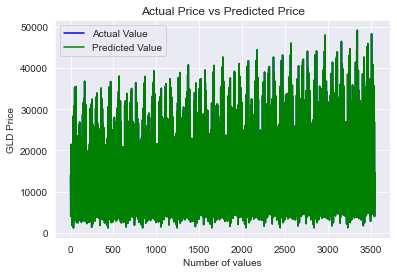

In [30]:
y_pred = list(y)
plt.plot(y, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()